Develop a machine learning model to predict the presence of heart disease in patients using clinical and demographic features (age, blood pressure, cholesterol levels, ECG results, exercise‐induced angina, etc.), enabling early detection and supporting physicians in treatment decisions.

### Data Cleansing

In [538]:
import pandas as pd
import numpy as np

In [539]:
# Getting The Data Ready
df = pd.read_csv(r"C:\Users\moham\Downloads\heart.csv")
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


In [540]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,2,normal,0


In [541]:
# Checking for missing Data
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64

In [542]:
# checking for information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [543]:
# Descriptive statistics
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.686469,0.458746
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.947661,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [544]:
# Checking for duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(duplicate_count)
else:
    print("There aren't any duplicates.")

There aren't any duplicates.


In [545]:
# Dropping missing values
df = df.dropna()

In [546]:
# Cheking for the percentage distribution of the Target variable
target_percentages = df["Target"].value_counts(normalize=True) * 100

print("Percentage distribution of Target ")
print(target_percentages)

Percentage distribution of Target 
Target
0    54.152824
1    45.847176
Name: proportion, dtype: float64


### Exploraty Data Analysis(EDA)

In [547]:
# Most of the Eda needed with Profile Report 
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling report")
profile.to_widgets()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 596.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [548]:
# Idintifing the Numeric and String
string_columns = df.select_dtypes(include=[np.object_])
numeric_columns = df.select_dtypes(include=[np.number])
print(string_columns.columns)
numeric_columns.columns

Index(['ChestPain', 'Thal'], dtype='object')


Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'Target'],
      dtype='object')

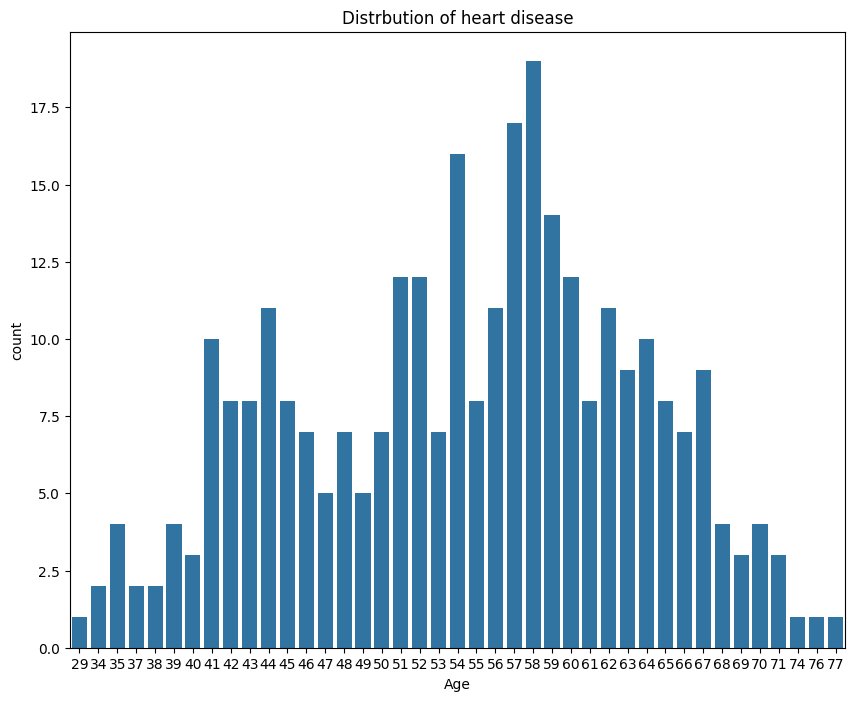

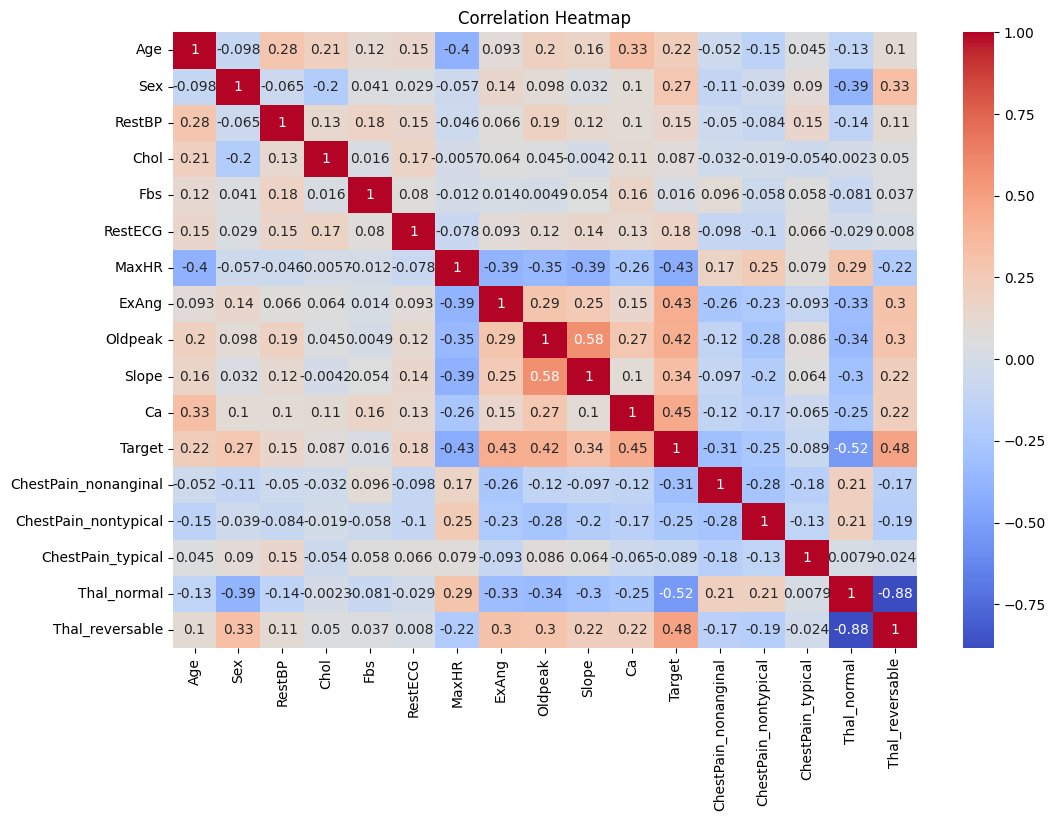

In [549]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the age column
plt.figure(figsize=(10, 8))
sns.countplot(x="Age", data=df)
plt.title("Distrbution of heart disease")
plt.show()

# Visualizing the correlation between features
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



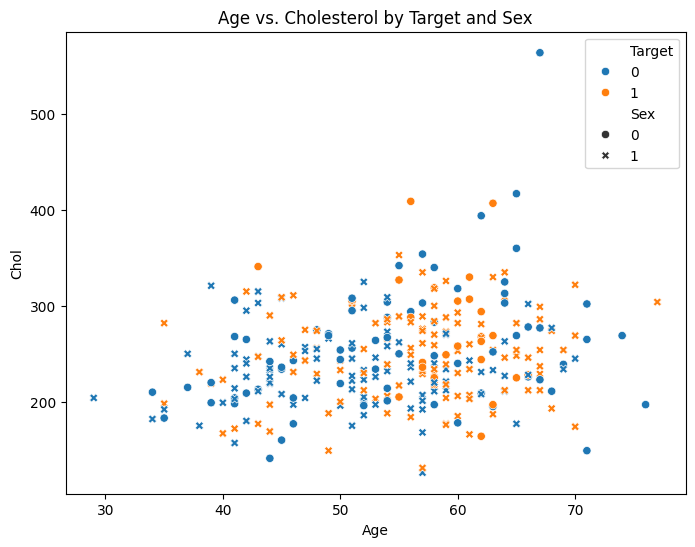

In [550]:
# Custom scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Chol', hue='Target', style='Sex', data=df)
plt.title("Age vs. Cholesterol by Target and Sex")
plt.show()

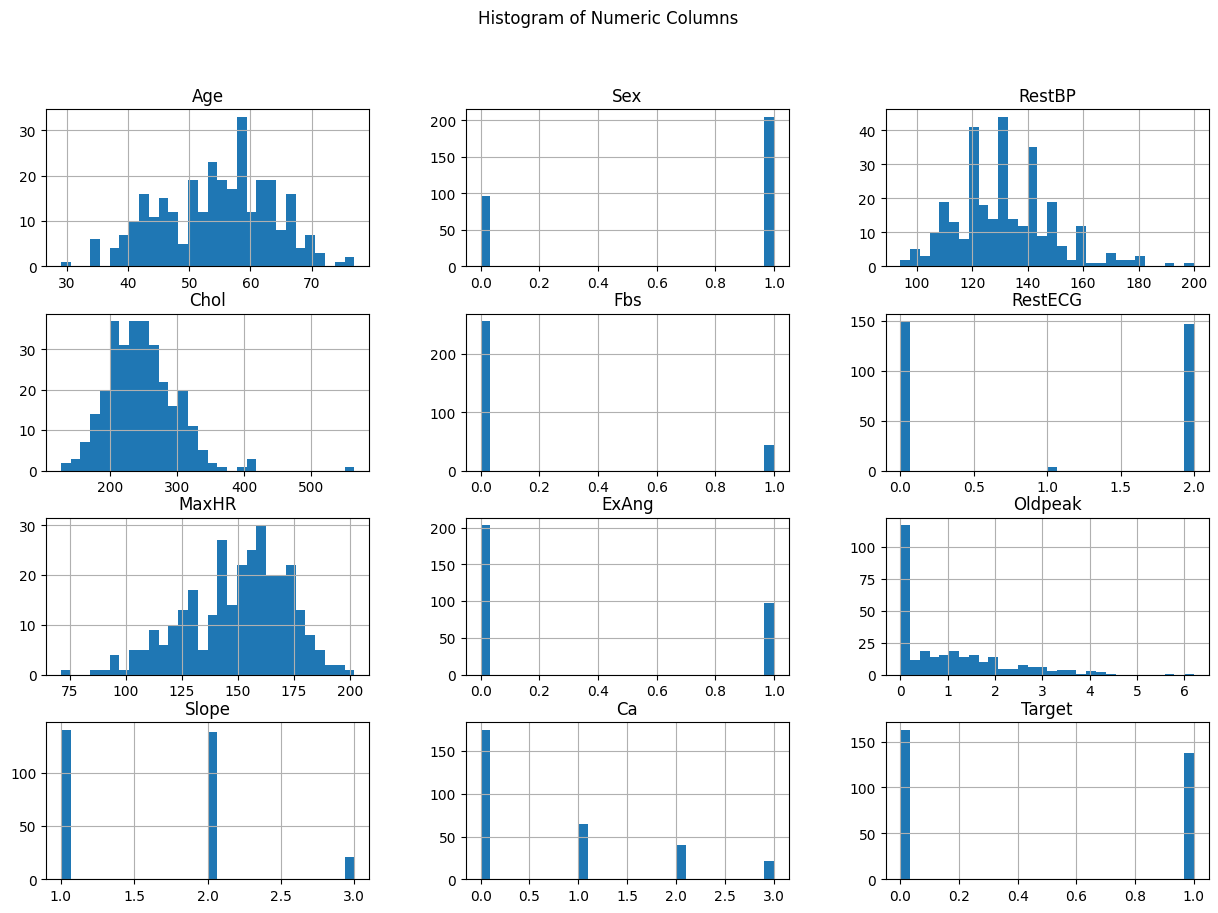

In [551]:
# Visualizing the distribution of the features
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram of Numeric Columns')
plt.show()


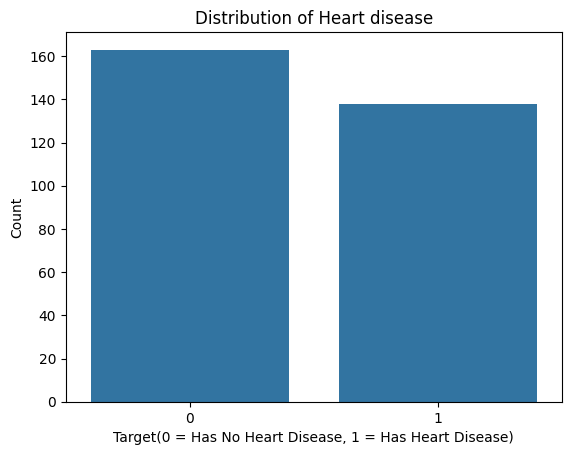

In [552]:
# Visualizing the distribution of the target variable
sns.countplot(x="Target", data=df)
plt.title("Distribution of Heart disease")
plt.ylabel("Count")
plt.xlabel("Target(0 = Has No Heart Disease, 1 = Has Heart Disease)")
plt.show()

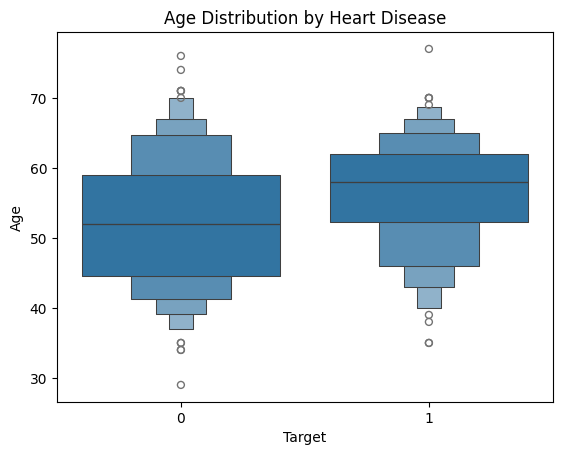

In [553]:
# Comparing the distribution of Age by Target
plt.Figure(figsize=(10,6))
sns.boxenplot(x="Target", y="Age", data=df)
plt.xlabel("Target")
plt.ylabel("Age")
plt.title("Age Distribution by Heart Disease")
plt.show()

## Preprocessing and Model Training

In [554]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

smote = SMOTE(random_state=42)

# Building Decision Tree model
dt_model = Pipeline([
    ('smote',      smote),
    ('scaler',     StandardScaler()),
    ('classifier', DecisionTreeClassifier(
        max_depth=1,             
        min_samples_leaf=15,     
        min_samples_split=25,    
        max_features='log2',
        random_state=42
    )),
])
# Building Random Forest model
rf_model = Pipeline([
    ('smote',      smote),
    ('scaler',     StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=8,            
        min_samples_leaf=6,      
        min_samples_split=10,    
        n_estimators=100,
        max_features='sqrt',    
        random_state=42
    )),
])

# Building SVc model
svc_model = Pipeline([
    ('smote',      smote),
    ('scaler',     StandardScaler()),
    ('classifier', SVC(
        C=0.5,                   
        kernel='linear',
        probability=True,
        random_state=42
    )),
])

# Building Logistic Regression model
logistic_model = Pipeline([
    ("smote", smote),
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(C = 0.1,
                                      l1_ratio = 0.0, 
                                      penalty = 'l1', 
                                      solver = 'saga',
                                      random_state=42))
])

In [555]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings("ignore")

# Splitting the data into training and testing sets
x = df.drop("Target", axis=1)
x = pd.get_dummies(x)

y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to evaluate model Descision Tree classifier performance
param_grid_dt = {
    'classifier__max_depth'           : [3, 5, 7, 10],
    'classifier__min_samples_split'   : [5, 10, 20],
    'classifier__min_samples_leaf'    : [2, 4, 5],
    'classifier__max_features'        : [None, 'sqrt', 'log2'],
}

grid_search_dt = GridSearchCV(
    estimator = dt_model,
    param_grid= param_grid_dt,
    cv        = 5,
    scoring   = 'f1',
    n_jobs    = -1,
    error_score= 'raise'
)

grid_search_dt.fit(x_train, y_train)

print("Best parameters for pipeline:", grid_search_dt.best_params_)
best_pipeline = grid_search_dt.best_estimator_

# Function to evaluate model Random Forest classifier performance
param_grid_rf = {
    'classifier__n_estimators'      : [100, 200, 300],
    'classifier__max_depth'         : [None, 10, 20, 30],
    'classifier__min_samples_split' : [2, 5, 10],
    'classifier__min_samples_leaf'  : [1, 2, 4],
    'classifier__max_features'      : [None, 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator = rf_model,      
    param_grid= param_grid_rf, 
    cv        = 5,             
    scoring   = 'f1',          
    n_jobs    = -1,
    error_score= 'raise'             
)

grid_search_rf.fit(x_train, y_train)

print("Best RF params:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# Function to evaluate model SVC classifier performance
param_grid_svc = {
    'classifier__C'        : [0.1, 1, 10, 100],
    'classifier__kernel'   : ['linear', 'rbf', 'poly'],
    'classifier__gamma'    : ['scale', 'auto'],
    'classifier__degree'   : [2, 3, 4]     
}

grid_search_svc = GridSearchCV(
    estimator = svc_model,
    param_grid= param_grid_svc,
    cv        = 5,
    scoring   = 'f1',
    n_jobs    = -1,
    error_score= 'raise'
)

grid_search_svc.fit(x_train, y_train)

print("Best SVC params:", grid_search_svc.best_params_)
best_svc = grid_search_svc.best_estimator_

# Function to evaluate model Logistic Regression classifier performance
param_grid_log = {
    'classifier__C'        : [0.01, 0.1, 1, 10, 100],
    'classifier__penalty'  : ['l1', 'l2', 'elasticnet', None],
    'classifier__solver'   : ['saga'],           
    'classifier__l1_ratio' : [0.0, 0.5, 1.0]      
}

grid_search_log = GridSearchCV(
    estimator = logistic_model,
    param_grid= param_grid_log,
    cv        = 5,
    scoring   = 'f1',
    n_jobs    = -1,
    error_score= 'raise'  
)

grid_search_log.fit(x_train, y_train)

print("Best Logistic params:", grid_search_log.best_params_)
best_logistic = grid_search_log.best_estimator_


Best parameters for pipeline: {'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5}
Best RF params: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best SVC params: {'classifier__C': 0.1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Logistic params: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.0, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


### Model Evualation

### Desicion Tree Model

In [556]:
# Fitting the Decision Tree model
print("The decisiontree score:")
dt_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = dt_model.predict(x_train)
y_val_pred = dt_model.predict(x_test)
# Accuracy score for train and test data
dt_model.score(x_test, y_test)

The decisiontree score:


0.7049180327868853

In [557]:
# Classification report for Decision Tree
print("Classification report for Decision Tree:")
print(classification_report(y_test,y_val_pred))

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        34
           1       0.70      0.59      0.64        27

    accuracy                           0.70        61
   macro avg       0.70      0.69      0.70        61
weighted avg       0.70      0.70      0.70        61



In [558]:
# Cross-validation for Decision Tree
cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Desicion Tree: {cv_scores}")
print(f"Mean cross-validation score For Desicion Tree: {cv_scores.mean()}")

Cross-validation scores For Desicion Tree: [0.61538462 0.80952381 0.71428571 0.7027027  0.71111111]
Mean cross-validation score For Desicion Tree: 0.7106015906015906


In [559]:
# Confusing the Decision Tree model
print("Confusion matrix for Decision Tree:")
conf_matrix = confusion_matrix(y_test, y_val_pred)
print(conf_matrix)

Confusion matrix for Decision Tree:
[[27  7]
 [11 16]]


In [560]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_test, y_val_pred)
test_precision = precision_score(y_test, y_val_pred)
test_recall = recall_score(y_test, y_val_pred)
test_f1 = f1_score(y_test, y_val_pred)

# Print the results
print("Training Set Performance For Desicion Tree:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Desicion Tree:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Set Performance For Desicion Tree:
Accuracy: 0.7541666666666667
Precision: 0.776595744680851
Recall: 0.6576576576576577
F1 Score: 0.7121951219512195

Test Set Performance For Desicion Tree:
Accuracy: 0.7049180327868853
Precision: 0.6956521739130435
Recall: 0.5925925925925926
F1 Score: 0.64


### Random Forest Model

In [561]:
# Fitting The Random Forest model
print("The RandomForest score:")
rf_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = rf_model.predict(x_train)
y_val_pred = rf_model.predict(x_test)

# Accuracy score for train and test data
rf_model.score(x_test, y_test)

The RandomForest score:


0.819672131147541

In [562]:
# Classification report for Random Forest
print("Classification report for Random Forest:")
print(classification_report(y_test, y_val_pred))

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.79      0.81      0.80        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [563]:
# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Random Forest: {cv_scores}")
print(f"Mean cross-validation score For Random Forest: {cv_scores.mean()}")

Cross-validation scores For Random Forest: [0.72727273 0.86363636 0.7826087  0.82926829 0.8       ]
Mean cross-validation score For Random Forest: 0.8005572158488382


In [564]:
# Confusing the Random Forest model
print("Confusion matrix for Random Forest:")
conf_matrix = confusion_matrix(y_test, y_val_pred)
print(conf_matrix)

Confusion matrix for Random Forest:
[[28  6]
 [ 5 22]]


In [565]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_test, y_val_pred)
test_precision = precision_score(y_test, y_val_pred)
test_recall = recall_score(y_test, y_val_pred)
test_f1 = f1_score(y_test, y_val_pred)

# Print the results
print("Training Set Performance For Random Forest:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Random Forest:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Set Performance For Random Forest:
Accuracy: 0.8958333333333334
Precision: 0.9479166666666666
Recall: 0.8198198198198198
F1 Score: 0.8792270531400966

Test Set Performance For Random Forest:
Accuracy: 0.819672131147541
Precision: 0.7857142857142857
Recall: 0.8148148148148148
F1 Score: 0.8


### Svc Model

In [566]:
# Fitting the Svc Model
print("The Support vector classifier score:")

svc_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = svc_model.predict(x_train)
y_val_pred = svc_model.predict(x_test)

# Accuracy score for train and test data
svc_model.score(x_test, y_test)

The Support vector classifier score:


0.7868852459016393

In [567]:
# Classification report for Svc
print("Classification report for Svc:")
print(classification_report(y_test, y_val_pred))

Classification report for Svc:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.79      0.70      0.75        27

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [568]:
# Cross-validation for Svc
cv_scores = cross_val_score(svc_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Svc: {cv_scores}")
print(f"Mean cross-validation score For Svc: {cv_scores.mean()}")

Cross-validation scores For Svc: [0.8        0.85714286 0.81818182 0.7804878  0.86363636]
Mean cross-validation score For Svc: 0.8238897687678175


In [569]:
# Confusing the Svc model
print("Confusion matrix for Svc:")
conf_matrix = confusion_matrix(y_test, y_val_pred)
print(conf_matrix)

Confusion matrix for Svc:
[[29  5]
 [ 8 19]]


In [570]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_test, y_val_pred)
test_precision = precision_score(y_test, y_val_pred)
test_recall = recall_score(y_test, y_val_pred)
test_f1 = f1_score(y_test, y_val_pred)

# Print the results
print("Training Set Performance For Svc:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Svc:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Set Performance For Svc:
Accuracy: 0.8916666666666667
Precision: 0.9473684210526315
Recall: 0.8108108108108109
F1 Score: 0.8737864077669902

Test Set Performance For Svc:
Accuracy: 0.7868852459016393
Precision: 0.7916666666666666
Recall: 0.7037037037037037
F1 Score: 0.7450980392156863


### Logistic Regression

In [571]:
# Fitting the Logistic Regression model
print("The Logistic Regression score:")

logistic_model.fit(x_train, y_train)

# Prediction for train and test data
y_train_pred = logistic_model.predict(x_train)
y_val_pred = logistic_model.predict(x_test)

# Accuracy score for train and test data
logistic_model.score(x_test, y_test)

The Logistic Regression score:


0.8524590163934426

In [572]:
# Classification Report for Logistic Regression
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_val_pred))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.82      0.85      0.84        27

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [573]:
# Cross-validation for Logistic Regression
cv_scores = cross_val_score(logistic_model, x_train, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores For Logistic Regression: {cv_scores}")
print(f"Mean cross-validation score For Logistic Regression: {cv_scores.mean()}")

Cross-validation scores For Logistic Regression: [0.8        0.90909091 0.88372093 0.7804878  0.81818182]
Mean cross-validation score For Logistic Regression: 0.8382962924766668


In [574]:
# Confusing the Random Logistic Regression model
print("Confusion matrix for Logistic Regression:")
conf_matrix = confusion_matrix(y_test, y_val_pred)
print(conf_matrix)

Confusion matrix for Logistic Regression:
[[29  5]
 [ 4 23]]


In [575]:
# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set performance
test_accuracy = accuracy_score(y_test, y_val_pred)
test_precision = precision_score(y_test, y_val_pred)
test_recall = recall_score(y_test, y_val_pred)
test_f1 = f1_score(y_test, y_val_pred)

# Print the results
print("Training Set Performance For Logistic Regression:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Performance For Logistic Regression:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Set Performance For Logistic Regression:
Accuracy: 0.8583333333333333
Precision: 0.8888888888888888
Recall: 0.7927927927927928
F1 Score: 0.8380952380952381

Test Set Performance For Logistic Regression:
Accuracy: 0.8524590163934426
Precision: 0.8214285714285714
Recall: 0.8518518518518519
F1 Score: 0.8363636363636363


In [577]:
# Save a model and load it 
import pickle 

pickle.dump(logistic_model, open("random_forst_model_1.pkl", "wb"))
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8524590163934426